## Final Karlo Cleaned dataset notebook

In [1]:
import os
import sys
from pathlib import Path

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style="darkgrid")

# Show all columns and full column content without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [2]:
# Get the project root directory
project_root = str(Path().absolute().parent)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Data Understanding

In [ ]:
!uv pip install odfpy

Using Python 3.10.10 environment at: /home/zeus/miniconda3/envs/cloudspace
Audited 1 package in 39ms


In [4]:
data = pd.read_excel("/teamspace/uploads/finalCleaned-data.ods", engine='odf')
# Display the first few rows of the dataset
data.head(10)

,county,soil pH,Total N %,TOC %,P (ppm),K me%,Ca me%,Mg me%,FERTILITY STATUS,FERTILIZER RECOMMENDATION
0,Baringo,5.76,0.08,0.44,23,1.36,3.9,3.3,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
1,Baringo,5.68,0.07,0.38,14,1.20,3.7,1,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
2,Baringo,5.1,0.07,0.39,19,1.10,3.5,2.32,Poor soil,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
3,Baringo,6.25,0.08,0.49,36,1.30,6.9,4.04,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
4,Baringo,6.63,0.09,0.69,67,1.66,6.5,6.22,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
5,Baringo,6.3,0.08,0.57,25,1.28,4.7,2.06,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
6,Baringo,6.32,0.08,0.58,169,1.08,4.5,4.84,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
7,Baringo,7.11,0.11,0.45,17,0.62,1.3,1.47,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
8,Baringo,6.62,0.08,0.34,25,2.16,10.9,2.86,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
9,Baringo,6.99,0.09,0.35,37,2.24,14.5,3.9,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"


In [5]:
# sampling the data
data.sample(10)

,county,soil pH,Total N %,TOC %,P (ppm),K me%,Ca me%,Mg me%,FERTILITY STATUS,FERTILIZER RECOMMENDATION
67418,Tana River,4.97,0.13,1.48,50,0.92,5.8,5.22,Moderately Healthy,Apply agricultural calcitic lime 14 days before planting
60757,NAROK,6.2,0.32,3.1,21,0.89,4.7,3.72,Moderately Healthy,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
49197,Migori,5.33,0.12,1.29,25,0.32,1.8,1.42,Poor soil,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
47040,Meru,7.12,0.34,3.33,105,1.69,10.3,5.79,Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
55028,Nakuru,5.64,0.34,3.35,33,1.50,4.5,2.36,Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
15981,Kajiado,5.79,0.13,1.12,40,0.64,4.8,2.54,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
25883,Kilifi,5.37,0.03,0.3,9,0.08,NaN,NaN,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
2754,BUNGOMA,5.98,0.27,3.82,28,1.27,4.9,9.58,Moderately Healthy,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
38325,Laikipia,5.91,0.13,1.16,60,1.48,6.8,4.3,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
49079,Migori,5.58,0.26,2.47,5,0.18,12,3.32,Poor soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"


In [6]:
# preview of the last 5 rows
data.tail(10)

,county,soil pH,Total N %,TOC %,P (ppm),K me%,Ca me%,Mg me%,FERTILITY STATUS,FERTILIZER RECOMMENDATION
75490,WEST POKOT,3.88,NaN,NaN,7,0.0044,0.0081,0.003,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75491,WEST POKOT,4.16,NaN,NaN,8,0.0176,0.1466,0.0174,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75492,WEST POKOT,4.2,NaN,NaN,8,0.0132,0.1462,0.0191,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75493,WEST POKOT,4.25,NaN,NaN,7,0.0066,0.1502,0.0208,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75494,WEST POKOT,4.28,NaN,NaN,5,0.0022,0.0975,0.0128,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75495,WEST POKOT,4.24,NaN,NaN,6,0.0011,0.0554,0.0163,Very poor,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
75496,WEST POKOT,5.5,NaN,NaN,153,0.0507,0.3822,0.0608,Poor soil,Apply agricultural calcitic lime 14 days before planting
75497,WEST POKOT,5.68,NaN,NaN,326,0.0485,0.3654,0.0599,Poor soil,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
75498,WEST POKOT,5.73,NaN,NaN,100,0.0242,0.0998,0.0637,Poor soil,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
75499,WEST POKOT,5.74,NaN,NaN,81,0.0352,0.2947,0.0573,Poor soil,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"


In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75500 entries, 0 to 75499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county                     75500 non-null  object 
 1   soil pH                    74502 non-null  object 
 2   Total N %                  71913 non-null  object 
 3   TOC %                      70709 non-null  object 
 4   P (ppm)                    73136 non-null  object 
 5   K me%                      73755 non-null  float64
 6   Ca me%                     72048 non-null  object 
 7   Mg me%                     72026 non-null  object 
 8   FERTILITY STATUS           75500 non-null  object 
 9   FERTILIZER RECOMMENDATION  75500 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.8+ MB


In [8]:
# Display the shape of the dataset
data.shape

(75500, 10)

In [9]:
# Normalize the 'FERTILITY STATUS' column to title case
data['FERTILITY STATUS'] = data['FERTILITY STATUS'].str.strip().str.title()

# Now check the value counts again
print(data['FERTILITY STATUS'].value_counts())

FERTILITY STATUS
Poor Soil             32239
Moderately Healthy    24001
Very Poor             11860
Healthy                7400
Name: count, dtype: int64


In [10]:
data["FERTILIZER RECOMMENDATION"].value_counts()

FERTILIZER RECOMMENDATION
Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN                                                              28622
Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre                                                                     19498
Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN    19127
Apply agricultural calcitic lime 14 days before planting                                                                                      8253
Name: count, dtype: int64

In [11]:
data['FERTILITY STATUS'].unique()

array(['Poor Soil', 'Moderately Healthy', 'Very Poor', 'Healthy'],
      dtype=object)

In [12]:
# Strip whitespace and title-case the county names to standardize 
data['county'] = data['county'].str.strip().str.title()

# check the value counts of the 'county' column
# data['county'].value_counts()

### Data Cleaning and Wrangling

#### 1. Checking for completeness

In [13]:
# checking for missing values
data.isna().sum()

county                          0
soil pH                       998
Total N %                    3587
TOC %                        4791
P (ppm)                      2364
K me%                        1745
Ca me%                       3452
Mg me%                       3474
FERTILITY STATUS                0
FERTILIZER RECOMMENDATION       0
dtype: int64

In [14]:
# calculating percentages of missing values
def missing_values_percentages(df: pd.DataFrame):

    missing_percent = (df.isna().sum() /len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, "Missing (%)": missing_percent})
    missing_df = missing_df[missing_df["Missing (%)"] > 0].sort_values(by='Missing (%)', ascending=False)

    return missing_df

In [15]:
# checking missing values before dropping 
missing_values = missing_values_percentages(data)
print("Missing Values Percentages:")
print(missing_values)

Missing Values Percentages:
              Column  Missing (%)
TOC %          TOC %     6.345695
Total N %  Total N %     4.750993
Mg me%        Mg me%     4.601325
Ca me%        Ca me%     4.572185
P (ppm)      P (ppm)     3.131126
K me%          K me%     2.311258
soil pH      soil pH     1.321854


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75500 entries, 0 to 75499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county                     75500 non-null  object 
 1   soil pH                    74502 non-null  object 
 2   Total N %                  71913 non-null  object 
 3   TOC %                      70709 non-null  object 
 4   P (ppm)                    73136 non-null  object 
 5   K me%                      73755 non-null  float64
 6   Ca me%                     72048 non-null  object 
 7   Mg me%                     72026 non-null  object 
 8   FERTILITY STATUS           75500 non-null  object 
 9   FERTILIZER RECOMMENDATION  75500 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.8+ MB


In [17]:
# Drop the missing values since not alot of them are missing
data = data.dropna()

In [ ]:
# checking missing values after dropping
missing_values = missing_values_percentages(data)
print("Missing Values Percentages:")
print(missing_values)

Missing Values Percentages:
Empty DataFrame
Columns: [Column, Missing (%)]
Index: []


#### 2. Checking for Consistency

In [ ]:
# checking for duplicated values
data.duplicated().sum()

2277

In [20]:
# drop duplicated values
data = data.drop_duplicates()

In [ ]:
# check that duplicated values are dropped
data.duplicated().sum()

0

#### 3. Checking for Uniformity

In [22]:
# standardizing column
data.columns = data.columns.str.lower()

In [ ]:
# getting info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65318 entries, 0 to 75485
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county                     65318 non-null  object 
 1   soil ph                    65318 non-null  object 
 2   total n %                  65318 non-null  object 
 3   toc %                      65318 non-null  object 
 4   p (ppm)                    65318 non-null  object 
 5   k me%                      65318 non-null  float64
 6   ca me%                     65318 non-null  object 
 7   mg me%                     65318 non-null  object 
 8   fertility status           65318 non-null  object 
 9   fertilizer recommendation  65318 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.5+ MB


In [24]:
# rename the columns into more descriptive names without spaces or other characters
data = data.rename(columns={
    'county': 'County',
    'soil ph': 'Soil_pH',
    'total n %': 'Total_N_percent',
    'toc %': 'Total_OC_percent',
    'p (ppm)': 'Phosphorus_ppm',
    'k me%': 'Potassium_me_percent',
    'ca me%': 'Calcium_me_percent',
    'mg me%': 'Magnesium_me_percent',
    'fertility status': 'Fertility_Status',
    'fertilizer recommendation': 'Fertilizer_Recommendation'
})

In [25]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

In [26]:
# Converting numerical columns to appropriate data types
numerical_columns = ['Soil_pH', 'Total_N_percent', 'Total_OC_percent', 'Phosphorus_ppm', 'Calcium_me_percent', 'Magnesium_me_percent']

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.'), errors='coerce')

In [28]:
for col in numerical_columns:
    # check which values will cause issues
    bad_values = data[~data[col].astype(str).str.replace(',', '.').str.match(r'^-?\d+(\.\d+)?$')][col].unique()
    print(f"{col} - problematic values:", bad_values)

Soil_pH - problematic values: [nan]
Total_N_percent - problematic values: [nan]
Total_OC_percent - problematic values: [nan]
Phosphorus_ppm - problematic values: [nan]
Calcium_me_percent - problematic values: [nan]
Magnesium_me_percent - problematic values: [nan]


In [29]:
data.isna().sum()

County                        0
Soil_pH                       6
Total_N_percent               1
Total_OC_percent              2
Phosphorus_ppm               25
Potassium_me_percent          0
Calcium_me_percent            2
Magnesium_me_percent         46
Fertility_Status              0
Fertilizer_Recommendation     0
dtype: int64

In [30]:
# drop the nan values that resulted from the conversion
data = data.dropna()
# Check if there are any remaining missing values
if data.isna().sum().any():
    print("There are still missing values in the dataset.")
else:
    print("No missing values remaining in the dataset.")

No missing values remaining in the dataset.


In [31]:
# Handle categorical columns
categorical_columns = ['County', 'Fertility_Status', 'Fertilizer_Recommendation']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65236 entries, 0 to 75485
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   County                     65236 non-null  category
 1   Soil_pH                    65236 non-null  float64 
 2   Total_N_percent            65236 non-null  float64 
 3   Total_OC_percent           65236 non-null  float64 
 4   Phosphorus_ppm             65236 non-null  float64 
 5   Potassium_me_percent       65236 non-null  float64 
 6   Calcium_me_percent         65236 non-null  float64 
 7   Magnesium_me_percent       65236 non-null  float64 
 8   Fertility_Status           65236 non-null  category
 9   Fertilizer_Recommendation  65236 non-null  category
dtypes: category(3), float64(7)
memory usage: 4.2 MB


#### 4. Checking for Validity

In [33]:
# statistical summary for the dataset
data.describe()

,Soil_pH,Total_N_percent,Total_OC_percent,Phosphorus_ppm,Potassium_me_percent,Calcium_me_percent,Magnesium_me_percent
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,6.012703,0.212410,2.142273,38.741553,0.868754,7.747785,3.188159
std,1.022527,11.354686,113.149852,49.035484,2.962752,11.655225,3.173258
min,2.520000,0.007000,0.030000,0.050000,0.010000,0.000000,0.010000
25%,5.280000,0.100000,0.970000,10.000000,0.320000,2.200000,1.740000
50%,5.890000,0.150000,1.530000,24.000000,0.670000,4.300000,2.860000
75%,6.600000,0.200000,2.150000,45.000000,1.180000,9.100000,4.270000
max,11.200000,2900.000000,28900.000000,1092.000000,663.000000,1320.000000,653.000000


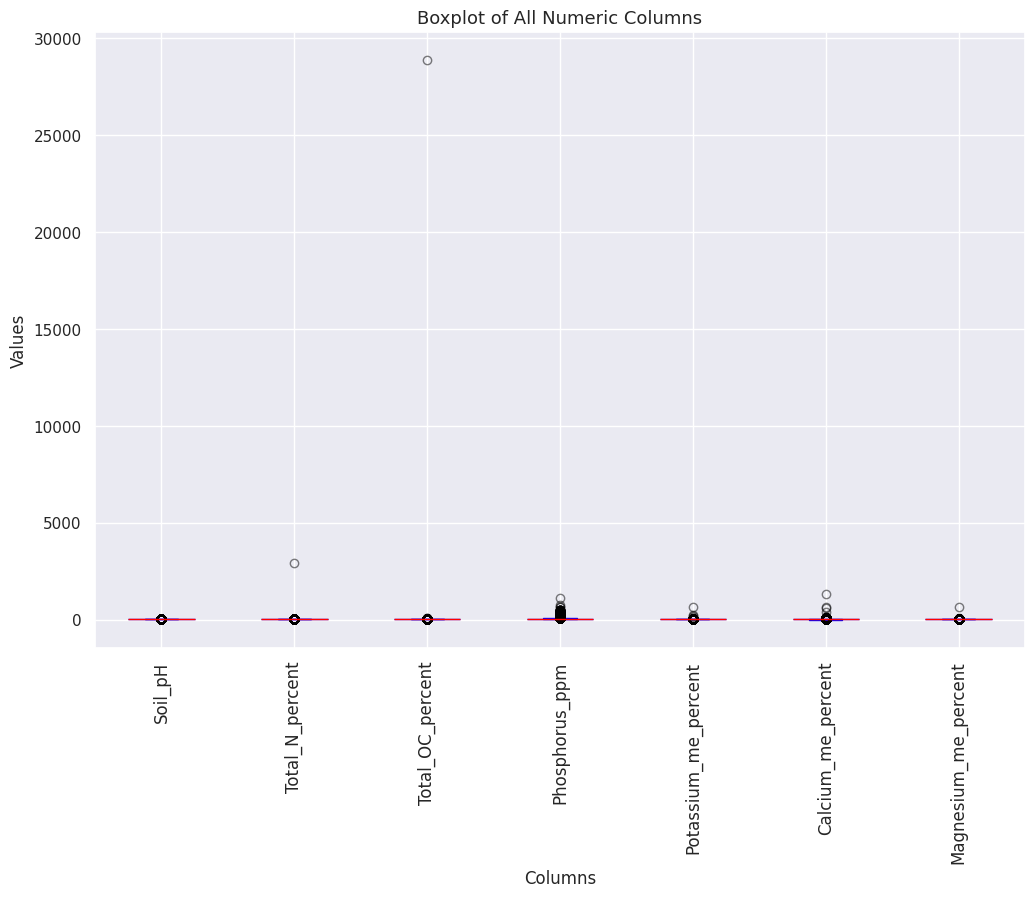

In [34]:
# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Create a boxplot for all numeric columns in the dataset
data.boxplot(patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
             medianprops=dict(color='red'), whiskerprops=dict(color='blue'),
             capprops=dict(color='blue'), flierprops=dict(marker='o', color='blue', alpha=0.5))

# Add a title and labels for the axes
plt.title("Boxplot of All Numeric Columns", fontsize=13)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

In [35]:
def check_outliers(df):
    # List to store outlier details for each column
    outlier_data = []

    # Loop through numeric columns
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Compute Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Compute outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / df.shape[0]) * 100

        # Append details to the list
        outlier_data.append({
            'column': col,
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    # Convert list to DataFrame
    outlier_df = pd.DataFrame(outlier_data)
    return outlier_df

In [36]:
# check for outliers in the dataset
print("Outliers in the dataset:")
check_outliers(data)

Outliers in the dataset:


,column,outlier_count,outlier_percentage,lower_bound,upper_bound
0,Soil_pH,658,1.008646,3.300,8.580
1,Total_N_percent,2824,4.328898,-0.050,0.350
2,Total_OC_percent,2183,3.346312,-0.800,3.920
3,Phosphorus_ppm,5536,8.486112,-42.500,97.500
4,Potassium_me_percent,2032,3.114845,-0.970,2.470
5,Calcium_me_percent,5760,8.829481,-8.150,19.450
6,Magnesium_me_percent,984,1.508370,-2.055,8.065


### Explanatory Data Analysis

#### 1. Univariate Data Analysis

In [37]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

In [38]:
data.Fertility_Status.value_counts()

Fertility_Status
Poor Soil             27602
Moderately Healthy    22277
Very Poor              8294
Healthy                7063
Name: count, dtype: int64

/tmp/ipykernel_3245/1597224508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Fertility_Status'], ax=ax, palette='Set2')


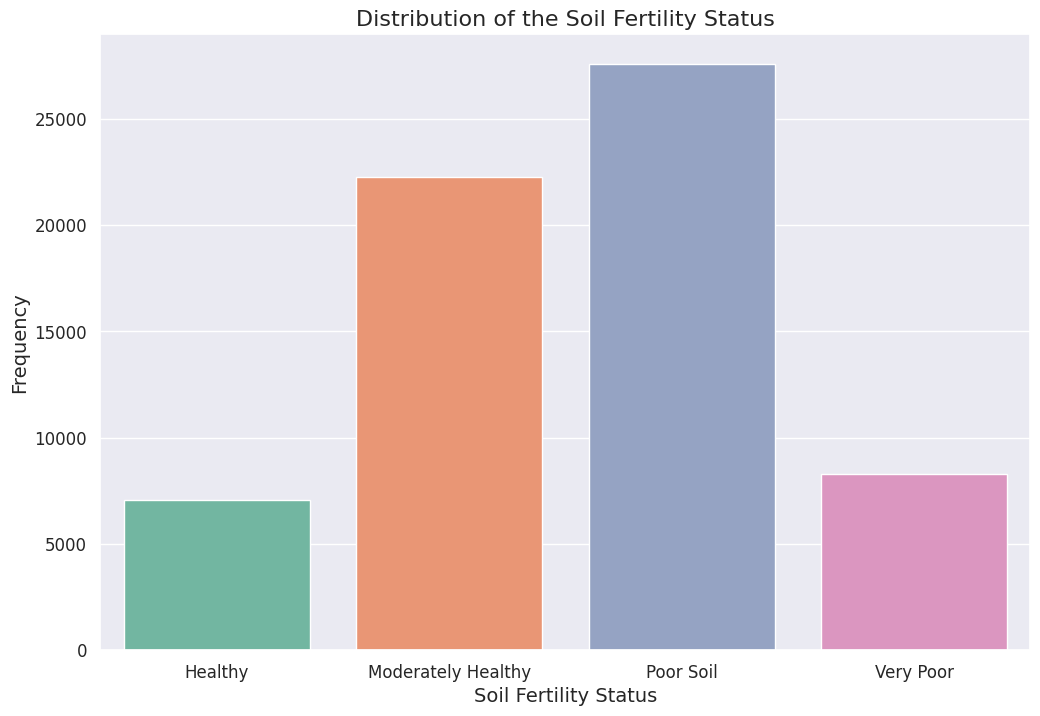

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=data['Fertility_Status'], ax=ax, palette='Set2')

plt.title("Distribution of the Soil Fertility Status", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Soil Fertility Status", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Saving the plot with higher resolution
# plot_path = 'eda_charts/soil_fertility_status_plot.png'
# plt.savefig(plot_path, dpi=300)

plt.show()

In [40]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

/tmp/ipykernel_3245/504538726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Fertilizer_Recommendation'], ax=ax, palette='magma')


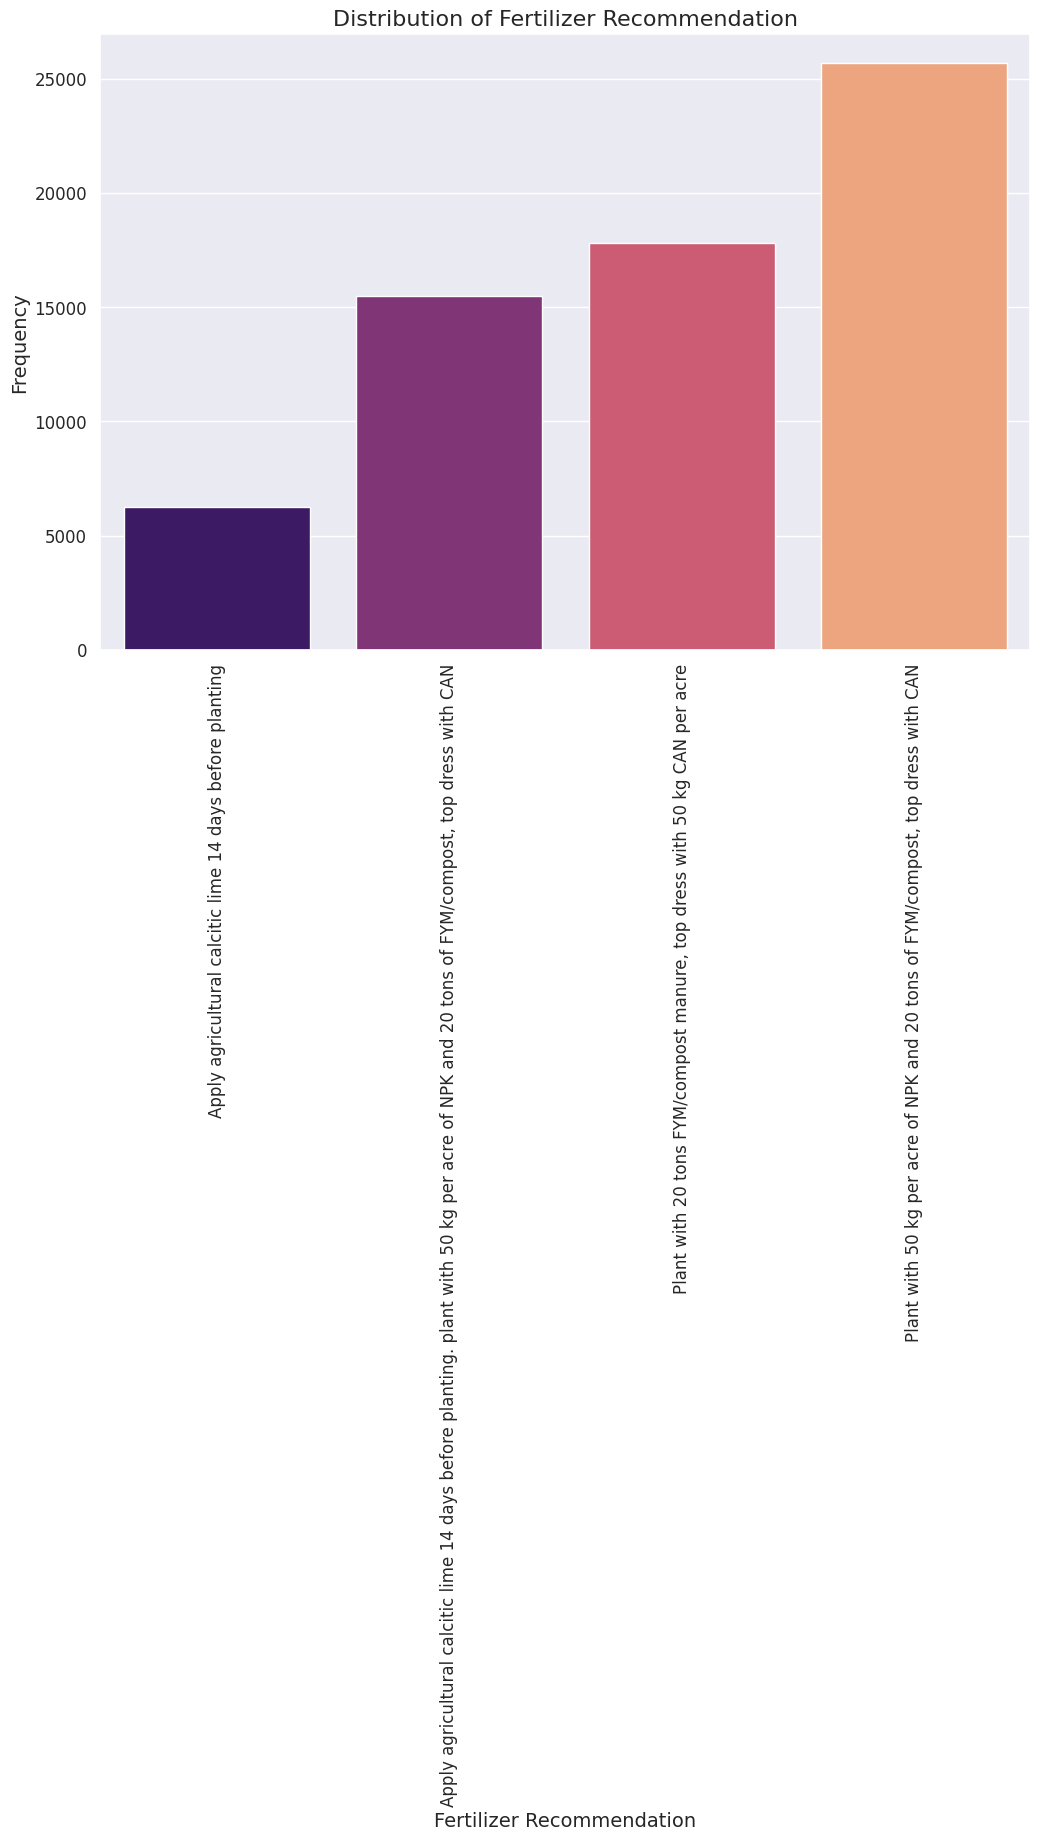

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=data['Fertilizer_Recommendation'], ax=ax, palette='magma')

plt.title("Distribution of Fertilizer Recommendation", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Fertilizer Recommendation", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Saving the plot with higher resolution
# plot_path = 'eda_charts/fertilizer_recommendation_1_plot.png'
# plt.savefig(plot_path, dpi=300)

plt.show()

In [42]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

/tmp/ipykernel_3245/1223590732.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='County', data=filtered_data, order=top_20_counties, ax=ax, palette='magma')


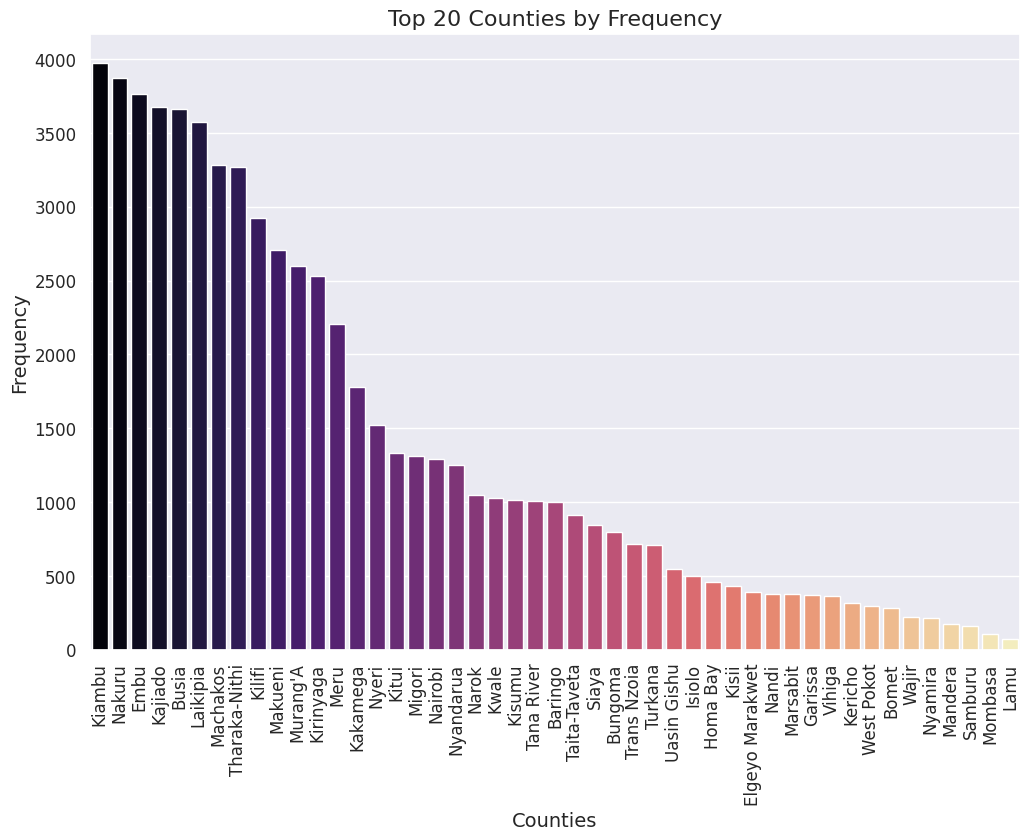

In [43]:
# Get the top 20 counties by frequency
top_20_counties = data['County'].value_counts().head(50).index

# Filter the dataset
filtered_data = data[data['County'].isin(top_20_counties)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='County', data=filtered_data, order=top_20_counties, ax=ax, palette='magma')

plt.title("Top 20 Counties by Frequency", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Counties", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Optional: save the figure
# plt.savefig('eda_charts/top_20_counties.png', dpi=300)

plt.show()


/tmp/ipykernel_3245/3082189391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['County'], ax=ax, palette='magma')


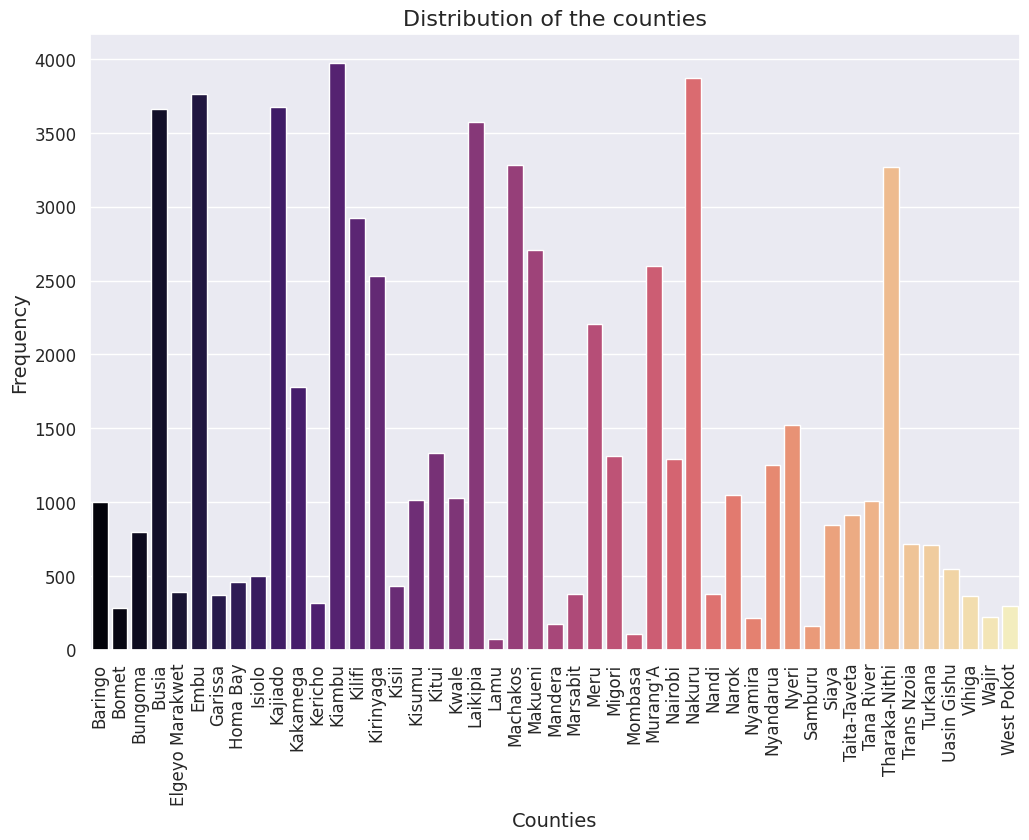

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=data['County'], ax=ax, palette='magma')

plt.title("Distribution of the counties", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Counties", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Saving the plot with higher resolution
# plot_path = 'eda_charts/fertilizer_recommendation_1_plot.png'
# plt.savefig(plot_path, dpi=300)

plt.show()

#### 2. Bivariate Data Analysis

In [45]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

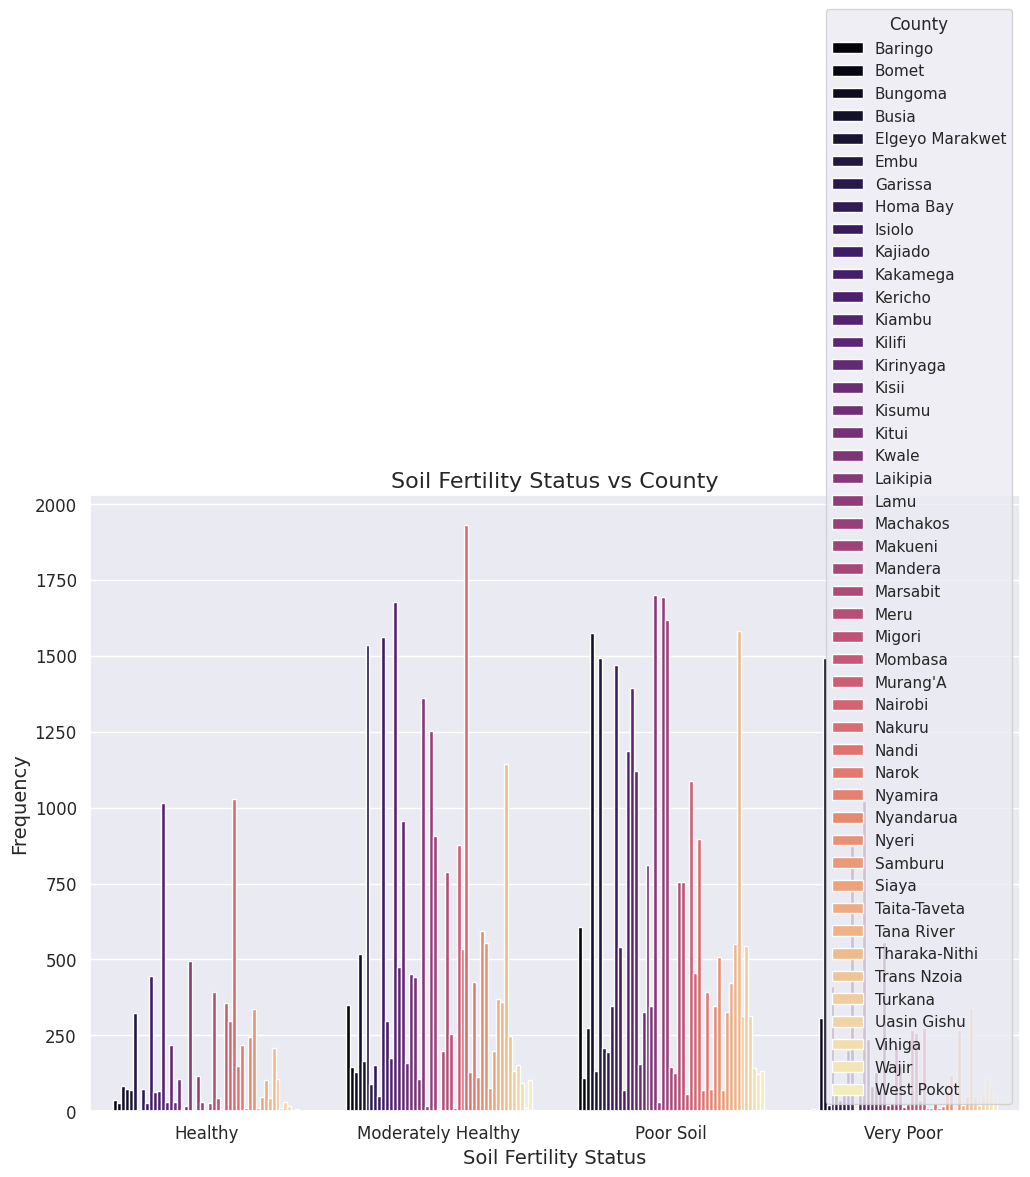

In [46]:
# The relationship between Soil Fertility Status and County

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Fertility_Status', hue='County', data=data, palette='magma', ax=ax)

plt.title("Soil Fertility Status vs County", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Soil Fertility Status", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Saving the plot with higher resolution
# plot_path = 'eda_charts/soil_fertility_vs_crop_recommendation_1.png'
# plt.savefig(plot_path, dpi=300) 

plt.show()

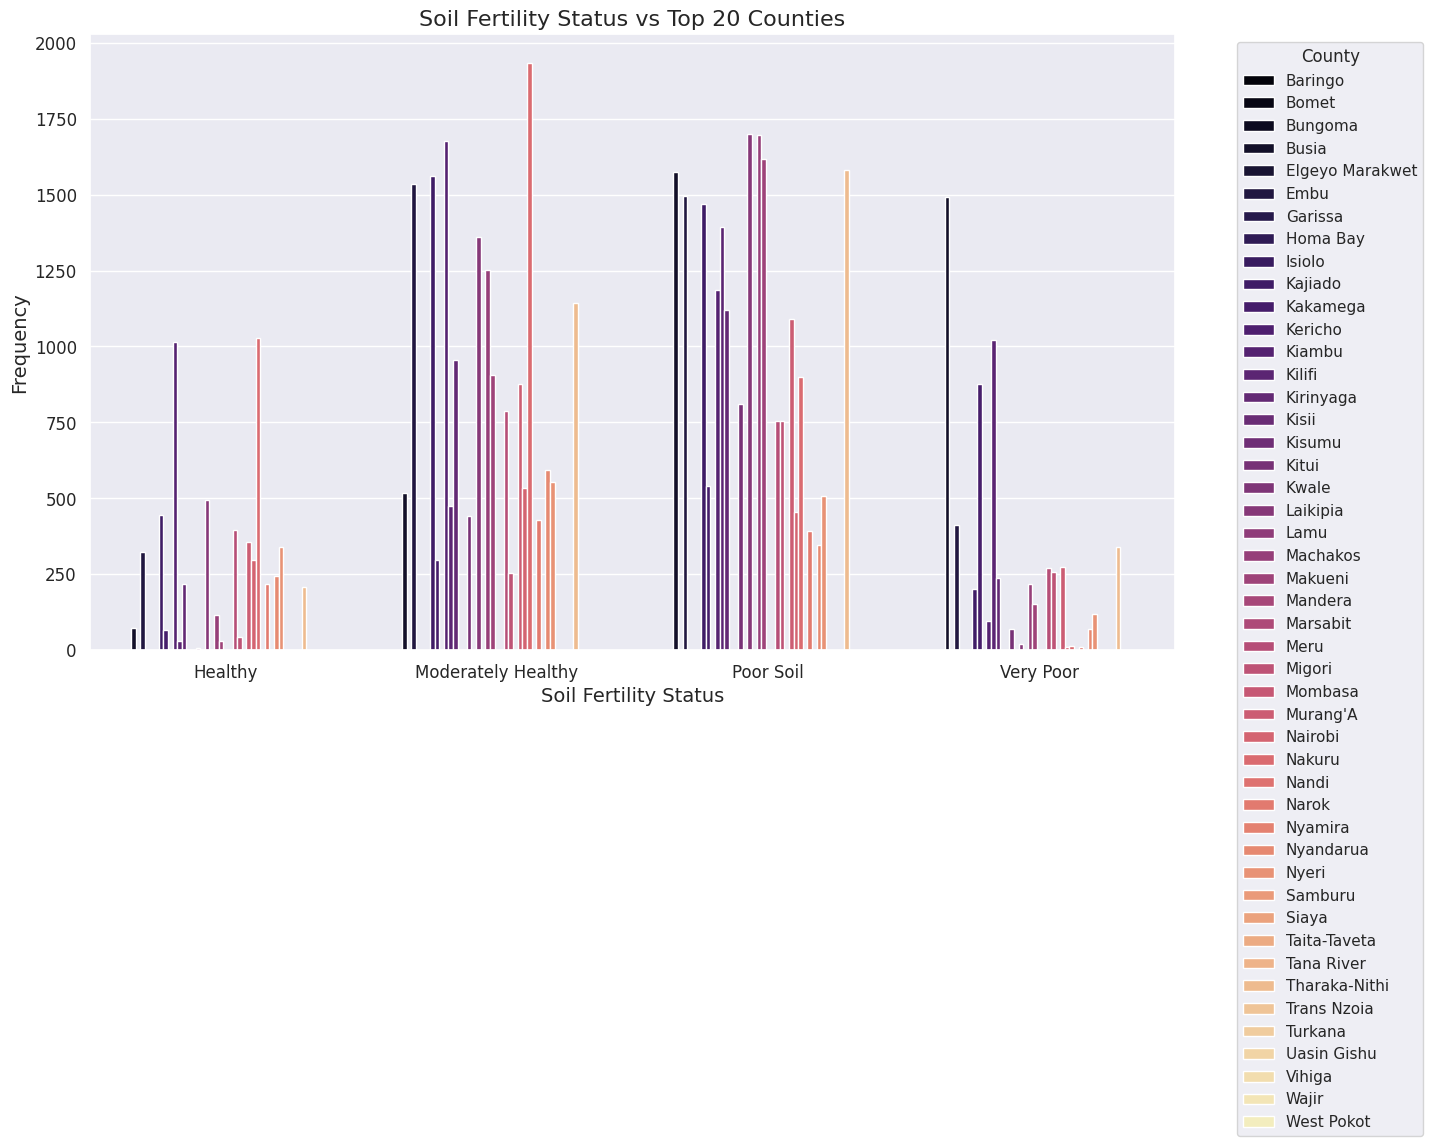

In [47]:
# Get the top 20 counties
top_20_counties = data['County'].value_counts().nlargest(20).index

# Filter the dataset to only include top 20 counties
filtered_data = data[data['County'].isin(top_20_counties)]

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='Fertility_Status', hue='County', data=filtered_data, palette='magma', ax=ax)

plt.title("Soil Fertility Status vs Top 20 Counties", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Soil Fertility Status", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')  # optional for clarity

# Save if needed
# plt.savefig('eda_charts/soil_fertility_vs_crop_recommendation_top20.png', dpi=300, bbox_inches='tight')


plt.show()

In [48]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

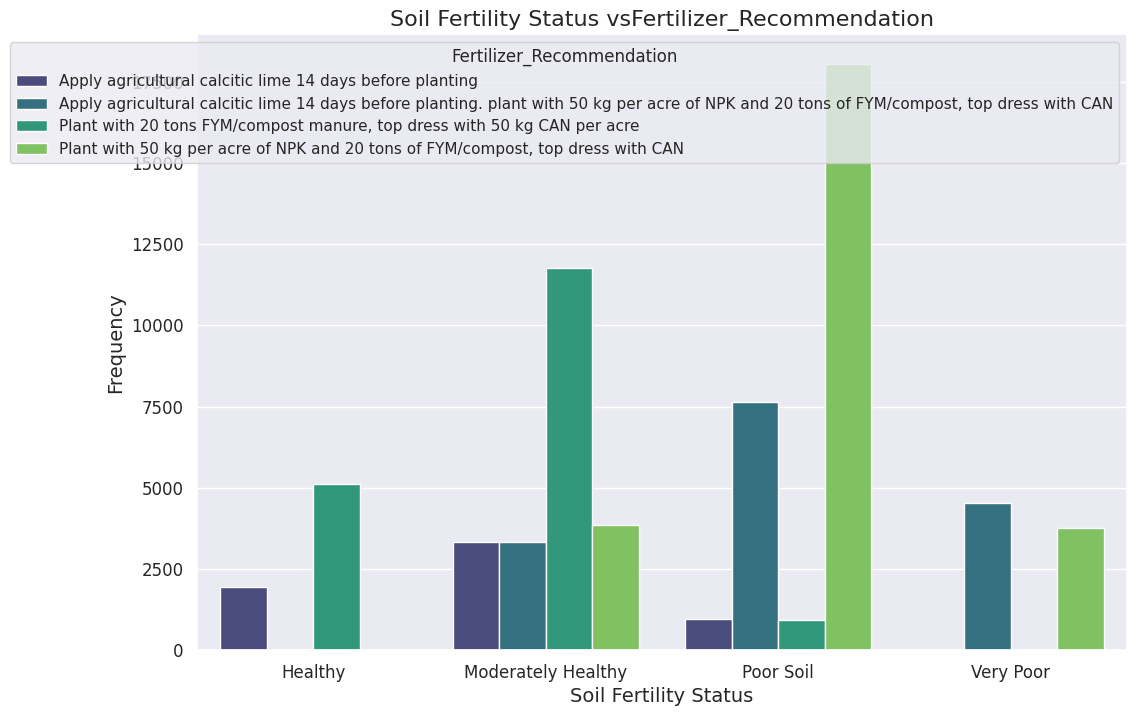

In [49]:
# The relationship between Soil Fertility Status and Crop Recommendation 1

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Fertility_Status', hue='Fertilizer_Recommendation', data=data, palette='viridis', ax=ax)

plt.title("Soil Fertility Status vsFertilizer_Recommendation", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Soil Fertility Status", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# # Saving the plot with higher resolution
# plot_path = 'eda_charts/soil_fertility_vs_crop_recommendation_1.png'
# plt.savefig(plot_path, dpi=300) 

plt.show()

#### 3. Multivariate Data Analysis

In [50]:
# Ensure df_clean contains only numerical data
df_clean_numeric = data.select_dtypes(include=['number'])

# Compute the correlation matrix if needed
correlation_matrix = df_clean_numeric.corr()

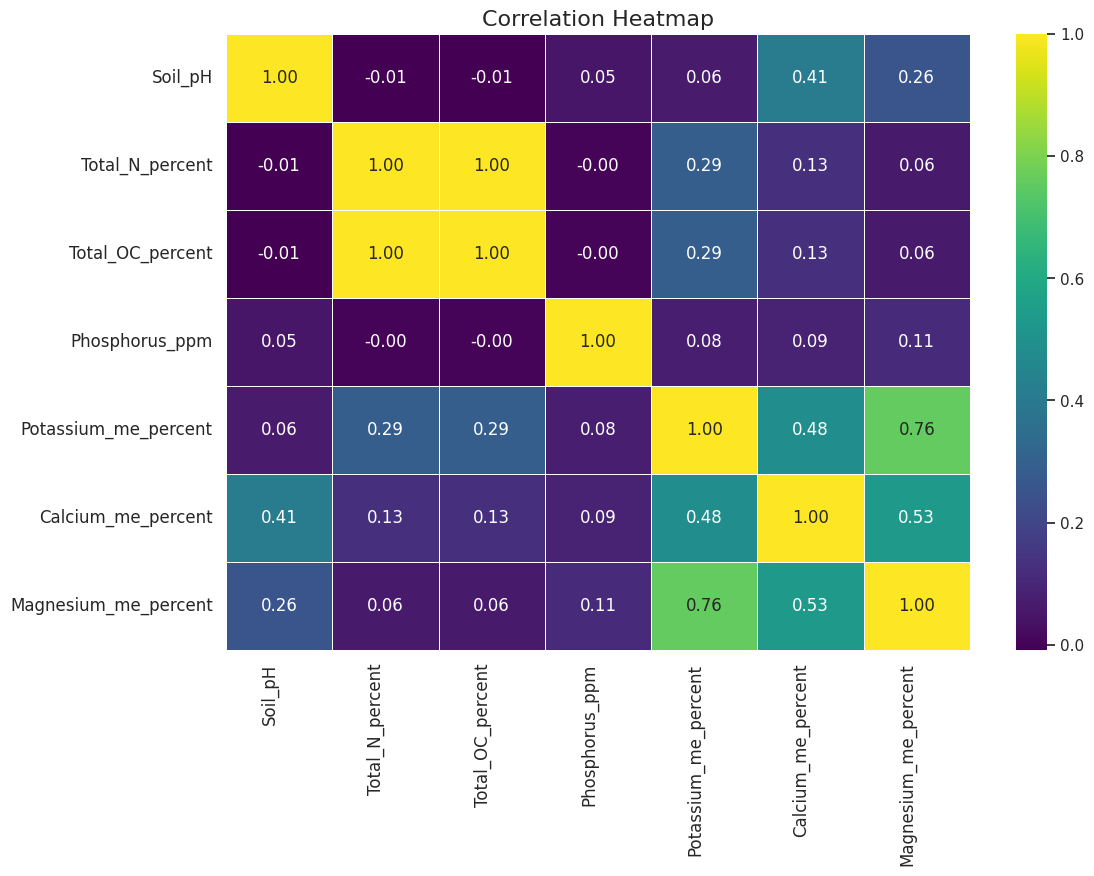

In [51]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', ax=ax, linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Saving the heatmap with higher resolution
# heatmap_path = 'eda_charts/soil_correlation_heatmap.png'
# plt.savefig(heatmap_path, dpi=300)

plt.show()

In [89]:
data.sample(10)

,County,Soil_pH,Total_N_percent,Total_OC_percent,Phosphorus_ppm,Potassium_me_percent,Calcium_me_percent,Magnesium_me_percent,Fertility_Status,Fertilizer_Recommendation
46746,Meru,5.78,0.20,1.93,50.0,0.62,3.5,3.46,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
66721,Taita-Taveta,6.85,0.09,0.94,39.0,0.57,2.5,2.40,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
36889,Laikipia,6.13,0.23,2.49,5.0,1.24,17.4,1.35,Moderately Healthy,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
44024,Makueni,6.61,0.10,0.85,150.0,0.32,6.2,2.99,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
31970,Kisumu,6.31,0.18,1.72,40.0,0.66,18.2,5.27,Moderately Healthy,"Plant with 20 tons FYM/compost manure, top dress with 50 kg CAN per acre"
22319,Kiambu,5.09,0.36,3.51,20.0,0.75,5.9,0.64,Moderately Healthy,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
7239,Embu,4.91,0.20,1.09,39.0,0.28,3.2,4.12,Moderately Healthy,Apply agricultural calcitic lime 14 days before planting
54116,Nairobi,6.12,0.18,1.90,10.0,1.46,5.2,2.60,Poor Soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
31392,Kisii,5.07,0.23,2.25,24.0,0.16,5.5,1.06,Poor Soil,"Apply agricultural calcitic lime 14 days before planting. plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"
64308,Nyeri,7.13,0.15,1.49,3.0,1.63,12.1,7.56,Poor Soil,"Plant with 50 kg per acre of NPK and 20 tons of FYM/compost, top dress with CAN"


In [91]:
# Save the cleaned dataset to a new file
data.to_csv('../data/cleaned_karlo_25_july_soil_data.csv', index=False)

### Data Preparation

In [52]:
# Importing necessary libraries for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [54]:
# laoding our custom preprocessing class
from api.utils.preprocessing import SoilDataPreprocessor

In [55]:
data.shape

(65236, 10)

In [56]:
data["Fertility_Status"].value_counts()

Fertility_Status
Poor Soil             27602
Moderately Healthy    22277
Very Poor              8294
Healthy                7063
Name: count, dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65236 entries, 0 to 75485
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   County                     65236 non-null  category
 1   Soil_pH                    65236 non-null  float64 
 2   Total_N_percent            65236 non-null  float64 
 3   Total_OC_percent           65236 non-null  float64 
 4   Phosphorus_ppm             65236 non-null  float64 
 5   Potassium_me_percent       65236 non-null  float64 
 6   Calcium_me_percent         65236 non-null  float64 
 7   Magnesium_me_percent       65236 non-null  float64 
 8   Fertility_Status           65236 non-null  category
 9   Fertilizer_Recommendation  65236 non-null  category
dtypes: category(3), float64(7)
memory usage: 4.2 MB


In [58]:
# During training phase
preprocessor = SoilDataPreprocessor()

# Fit and transform training data
train_data_processed = preprocessor.fit_transform(
    data, 
    target_column='Fertility_Status',
    encoding_type='label',
    scaling_type='standard',
    apply_smote=True
)

2025-06-25 19:50:07,395 - SoilDataPreprocessor - INFO - SoilDataPreprocessor initialized
INFO:SoilDataPreprocessor:SoilDataPreprocessor initialized
2025-06-25 19:50:07,400 - SoilDataPreprocessor - INFO - ============================================================
INFO:SoilDataPreprocessor:============================================================
2025-06-25 19:50:07,402 - SoilDataPreprocessor - INFO - Starting fit_transform process
INFO:SoilDataPreprocessor:Starting fit_transform process
2025-06-25 19:50:07,405 - SoilDataPreprocessor - INFO - Parameters - encoding: label, scaling: standard, SMOTE: True
INFO:SoilDataPreprocessor:Parameters - encoding: label, scaling: standard, SMOTE: True
2025-06-25 19:50:07,407 - SoilDataPreprocessor - INFO - Input DataFrame shape: (65236, 10)
INFO:SoilDataPreprocessor:Input DataFrame shape: (65236, 10)
2025-06-25 19:50:07,409 - SoilDataPreprocessor - INFO - Target column: Fertility_Status
INFO:SoilDataPreprocessor:Target column: Fertility_Status
20

In [59]:
# saving the preprocessor
preprocessor.save('../models/soil_fertility_status_preprocessor_karlo_25_july_2025.joblib')

2025-06-25 19:51:21,591 - SoilDataPreprocessor - INFO - Saving preprocessor to: ../models/soil_fertility_status_preprocessor_karlo_25_july_2025.joblib
INFO:SoilDataPreprocessor:Saving preprocessor to: ../models/soil_fertility_status_preprocessor_karlo_25_july_2025.joblib
Saving preprocessor: 100%|██████████| 1/1 [00:00<00:00, 361.39file/s]
2025-06-25 19:51:21,602 - SoilDataPreprocessor - INFO - Preprocessor saved successfully
INFO:SoilDataPreprocessor:Preprocessor saved successfully


In [60]:
train_data_processed.sample(10)

,County,Soil_pH,Total_N_percent,Total_OC_percent,Phosphorus_ppm,Potassium_me_percent,Calcium_me_percent,Magnesium_me_percent,Fertilizer_Recommendation,Fertility_Status
19256,12,-0.384054,-0.002854,-0.001346,-0.586142,-0.104213,0.553594,0.186510,3,2
99005,9,1.029085,-0.009900,-0.010496,-0.726039,-0.223293,-0.257403,-0.333439,3,3
54217,34,-0.462292,-0.001974,0.000510,-0.076304,-0.002955,-0.184278,-0.112869,2,1
15936,10,-1.117537,0.007714,0.005371,-0.382207,-0.218972,-0.493155,-0.342918,1,2
36791,21,1.542561,0.000668,-0.000108,-0.647323,0.003796,-0.347296,0.482738,3,1
22642,13,1.972871,-0.008139,-0.009653,-0.688110,-0.154842,1.445905,0.835690,3,2
37361,22,2.217365,-0.009019,-0.008946,-0.651402,-0.033332,0.013060,1.009015,3,2
104918,3,-1.255056,-0.003862,-0.001955,-0.484175,-0.253140,-0.560386,-0.388055,1,3
85756,29,0.707280,0.005427,0.004897,1.514432,0.443853,0.037077,0.836855,2,0
78733,4,0.110192,0.002496,0.002689,-0.154223,0.073544,0.004134,0.554309,2,0


In [61]:
data.columns

Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent', 'Fertility_Status',
       'Fertilizer_Recommendation'],
      dtype='object')

In [62]:
from sklearn.model_selection import train_test_split

X = train_data_processed.drop(columns=['Fertility_Status', 'Fertilizer_Recommendation'])
y = train_data_processed['Fertility_Status']

print(f"X columns used: \n", X.columns)
print(f"\ny target columns:", y.name)

# splitting the dataset into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

X columns used: 
 Index(['County', 'Soil_pH', 'Total_N_percent', 'Total_OC_percent',
       'Phosphorus_ppm', 'Potassium_me_percent', 'Calcium_me_percent',
       'Magnesium_me_percent'],
      dtype='object')

y target columns: Fertility_Status


### Modeling

In [63]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model metrics libraries
from sklearn.metrics import (
    accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, 
    confusion_matrix, classification_report
)

#### 1. Baseline Model

In [ ]:
# OneVsRestClassifier with LinearSVC 
# Initialize the OneVsRestClassifier with LinearSVC
OvR_clf = OneVsRestClassifier(LinearSVC(random_state=42, dual=False, max_iter=5000))

# Fit the model on the training data
OvR_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_ovr_clf = OvR_clf.predict(X_test)

In [65]:
# Model Evaluation for Logistic Regression
print("Multiclass with OneVsRest:")

# Accuracy is the ratio of correctly predicted observation to the total observations.
print(f"Accuracy: {accuracy_score(y_test, y_pred_ovr_clf):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
print(f"F1 Score: {f1_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

Multiclass with OneVsRest:
Accuracy: 0.7088
Precision: 0.6933
Recall: 0.7093
F1 Score: 0.6735


In [66]:
print("Classification report:\n", classification_report(y_test, y_pred_ovr_clf))

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71      6914
           1       0.57      0.21      0.31      6925
           2       0.72      0.77      0.75      6874
           3       0.88      0.99      0.93      6889

    accuracy                           0.71     27602
   macro avg       0.69      0.71      0.67     27602
weighted avg       0.69      0.71      0.67     27602



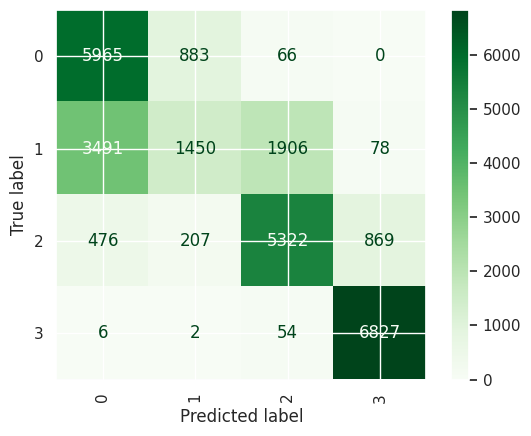

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ovr_clf, labels=OvR_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=OvR_clf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/models_evals/one_versus_rest_Final_karlo_confusion_matrix.png'
plt.savefig(plot_path)

In [81]:
# Save the model to a file
import joblib

joblib.dump(OvR_clf, '../models/Soil_Status_OneVsRest_Classifier_Final_karlo_25_july_model.joblib')
print("OneVsRestClassifier models saved to: models/Soil_Status_OneVsRest_Classifier__Final_karlo_25_july_model")

OneVsRestClassifier models saved to: models/Soil_Status_OneVsRest_Classifier__Final_karlo_25_july_model


#### 2. Decision tree

In [68]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = dtree.predict(X_test)

In [69]:
print("Multiclass with Decision tree classifier:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_tree, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_tree, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall.
print(f"F1 Score: {f1_score(y_test, y_pred_tree, average='macro'):.4f}")

Multiclass with Decision tree classifier:
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9996
F1 Score: 0.9996


In [70]:
print("Classification report:\n", classification_report(y_test, y_pred_tree))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6914
           1       1.00      1.00      1.00      6925
           2       1.00      1.00      1.00      6874
           3       1.00      1.00      1.00      6889

    accuracy                           1.00     27602
   macro avg       1.00      1.00      1.00     27602
weighted avg       1.00      1.00      1.00     27602



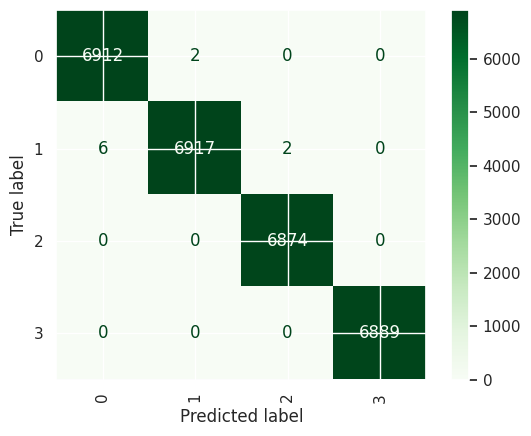

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tree, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/models_evals/decision_tree__Final_karlo_25_july_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [84]:
# Save the model to a file
joblib.dump(dtree, '../models/Soil_Status_decisionTree_Classifier_Final_karlo_25_july_model_v002.joblib')

print("Decision Tree Classifier models saved to: models/Soil_Status_decisionTree_Classifier_Final_karlo_25_july_model")

Decision Tree Classifier models saved to: models/Soil_Status_decisionTree_Classifier_Final_karlo_25_july_model


#### 3. Random Forest

In [ ]:
# Random forest classifier
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=142)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf.predict(X_test)

In [73]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")


Random Forest:
Accuracy: 0.9996739366712557
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997


In [74]:
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6914
           1       1.00      1.00      1.00      6925
           2       1.00      1.00      1.00      6874
           3       1.00      1.00      1.00      6889

    accuracy                           1.00     27602
   macro avg       1.00      1.00      1.00     27602
weighted avg       1.00      1.00      1.00     27602



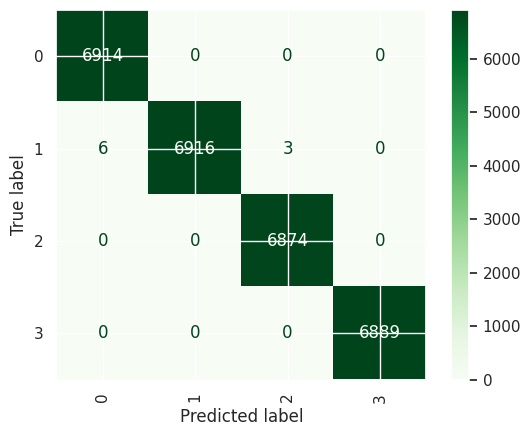

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
# plot_path = 'eda_charts/models_evals/random_forest_confusion_matrix.png'
# plt.savefig(plot_path)

plt.show()

In [85]:
# Save the model to a file
joblib.dump(rf, "../models/Soil_Status_randomForest_Classifier_Final_karlo_25_july_Model.joblib")

print("Random Forest Classifier saved to: models/Soil_Status_randomForest_Classifier_Final_karlo_25_july_Model")

Random Forest Classifier saved to: models/Soil_Status_randomForest_Classifier_Final_karlo_25_july_Model


#### 4. Gradient Boosting Machine

In [76]:
# xg boost

# initialise the model
xgb = XGBClassifier(random_state=142)

# Fit the model
xgb.fit(X_train, y_train)

# predict the test set
y_pred_xgb = xgb.predict(X_test)

In [77]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991


In [ ]:
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6914
           1       1.00      1.00      1.00      6925
           2       1.00      1.00      1.00      6874
           3       1.00      1.00      1.00      6889

    accuracy                           1.00     27602
   macro avg       1.00      1.00      1.00     27602
weighted avg       1.00      1.00      1.00     27602



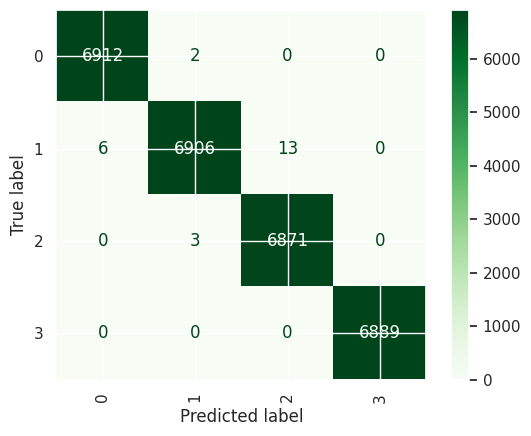

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
# plot_path = 'eda_charts/models_evals/xgboost_confusion_matrix.png'
# plt.savefig(plot_path)

plt.show()

In [87]:
# Save the model to a file
joblib.dump(rf, "../models/Soil_Status_xgb__Final_karlo_25_july_Model.joblib")

print("Gradient Boosting Classifier saved to: models/Soil_Status_xgb_Classifier_Final_karlo_25_july_Mdodel")

Gradient Boosting Classifier saved to: models/Soil_Status_xgb_Classifier_Final_karlo_25_july_Mdodel
